In [1]:
import numpy as np


In [2]:
%matplotlib inline

In [3]:
import matplotlib as plt
import seaborn as sns

In [4]:
import pandas as pd

In [5]:
df=pd.read_csv('Data/911.csv')

In [6]:
df.drop(labels='e',axis=1,inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652692 entries, 0 to 652691
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        652692 non-null  float64
 1   lng        652692 non-null  float64
 2   desc       652692 non-null  object 
 3   zip        573727 non-null  float64
 4   title      652692 non-null  object 
 5   timeStamp  652692 non-null  object 
 6   twp        652409 non-null  object 
 7   addr       652692 non-null  object 
dtypes: float64(3), object(5)
memory usage: 39.8+ MB


In [8]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END


In [9]:
# what are top 5 zip codes 

In [10]:
df['zip'].value_counts().head(5)

19401.0    44785
19464.0    43155
19403.0    34299
19446.0    31715
19406.0    22071
Name: zip, dtype: int64

In [11]:
# what are top 5 zip codes 

In [12]:
df['zip'].value_counts().iloc[:5]

19401.0    44785
19464.0    43155
19403.0    34299
19446.0    31715
19406.0    22071
Name: zip, dtype: int64

In [13]:
# Top five twp's 

In [14]:
df['twp'].value_counts().head(5)

LOWER MERION    54686
ABINGTON        39302
NORRISTOWN      36931
UPPER MERION    35412
CHELTENHAM      30044
Name: twp, dtype: int64

In [15]:
# Find how many unique titles

In [16]:
len(df['title'].unique())

148

In [17]:
# Use of lambda operation to add additional column in the data frame

In [18]:
df['Reason']=df['title'].apply(lambda x: x.split()[0])

In [19]:
df['Reason'].value_counts()

EMS:        326850
Traffic:    227045
Fire:        98797
Name: Reason, dtype: int64

# CounterPlot for Reason

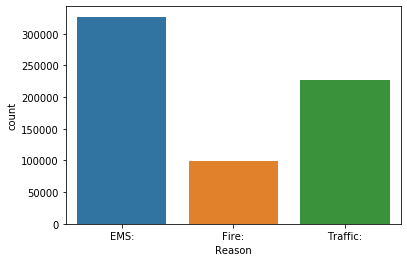

In [20]:
sns.countplot(x='Reason',data=df)

In [21]:
df['Reason']

0             EMS:
1             EMS:
2            Fire:
3             EMS:
4             EMS:
            ...   
652687        EMS:
652688        EMS:
652689    Traffic:
652690        EMS:
652691        EMS:
Name: Reason, Length: 652692, dtype: object

In [22]:
# Check existing datatype of datetime stamp

In [23]:
type(df['timeStamp'].iloc[0])

str

# Convert the datetime stamp and assign it to dataframe

In [24]:
df['timeStamp']= pd.to_datetime(df['timeStamp'])

In [25]:
type(df['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [26]:
# Get time information like day, hour, minute and sec related information

In [27]:
time=df['timeStamp'].iloc[0]

In [28]:
time.month

12

In [29]:
time.dayofweek

3

In [30]:
time

Timestamp('2015-12-10 17:10:52')

In [31]:
# Lambda function to get time information

In [32]:
df['Day Of Week']=df['timeStamp'].apply(lambda x:pd.to_datetime(x).dayofweek)

In [33]:
df['Day Of Week']

0         3
1         3
2         3
3         3
4         3
         ..
652687    0
652688    0
652689    0
652690    0
652691    0
Name: Day Of Week, Length: 652692, dtype: int64

In [34]:
df['Hour']=df['timeStamp'].apply(lambda x:pd.to_datetime(x).hour)

In [35]:
df['Month']=df['timeStamp'].apply(lambda x:pd.to_datetime(x).month)

In [36]:
dMap={0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [37]:
df['Day Of Week']=df['Day Of Week'].map(dMap)

In [38]:
df['Day Of Week']

0         Thu
1         Thu
2         Thu
3         Thu
4         Thu
         ... 
652687    Mon
652688    Mon
652689    Mon
652690    Mon
652691    Mon
Name: Day Of Week, Length: 652692, dtype: object

In [39]:
# Count Plot between Reason and Day of Week

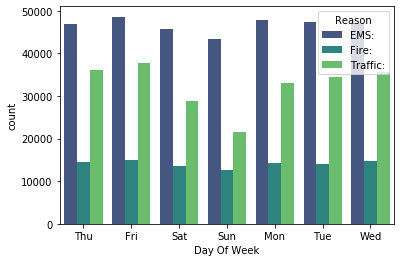

In [40]:
sns.countplot(hue='Reason',data=df,x='Day Of Week',palette='viridis')

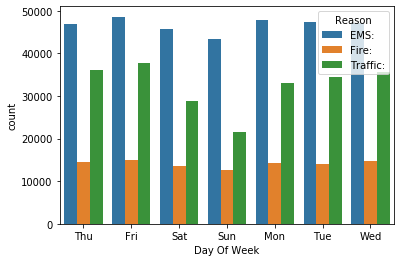

In [41]:
sns.countplot(hue='Reason',data=df,x='Day Of Week')

In [42]:
# Use of group by and plot 

In [43]:
#df1=df[1000:30000]

In [44]:
bymonth=df.groupby('Month').count()

In [45]:
bymonth

,lat,lng,desc,zip,title,timeStamp,twp,addr,Reason,Day Of Week,Hour
Month,,,,,,,,,,,
1,62336,62336,62336,55294,62336,62336,62312,62336,62336,62336,62336
2,55427,55427,55427,48922,55427,55427,55405,55427,55427,55427,55427
3,60027,60027,60027,53252,60027,60027,60001,60027,60027,60027,60027
4,53671,53671,53671,47349,53671,53671,53655,53671,53671,53671,53671
5,57509,57509,57509,50354,57509,57509,57474,57509,57509,57509,57509
6,59465,59465,59465,52099,59465,59465,59437,59465,59465,59465,59465
7,49571,49571,49571,43405,49571,49571,49550,49571,49571,49571,49571
8,48359,48359,48359,42311,48359,48359,48335,48359,48359,48359,48359
9,47213,47213,47213,41289,47213,47213,47196,47213,47213,47213,47213


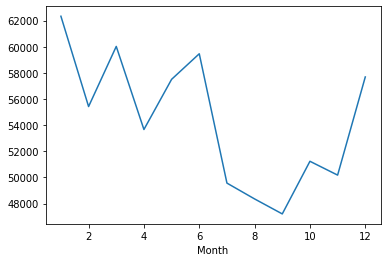

In [46]:
bymonth['lat'].plot()

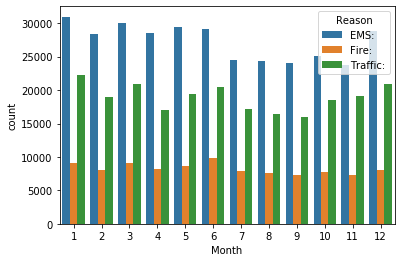

In [47]:
sns.countplot(hue='Reason',data=df,x='Month')

In [60]:
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)

TypeError: 'module' object is not callable

In [49]:
bymonth.reset_index()

,Month,lat,lng,desc,zip,title,timeStamp,twp,addr,Reason,Day Of Week,Hour
0,1,62336,62336,62336,55294,62336,62336,62312,62336,62336,62336,62336
1,2,55427,55427,55427,48922,55427,55427,55405,55427,55427,55427,55427
2,3,60027,60027,60027,53252,60027,60027,60001,60027,60027,60027,60027
3,4,53671,53671,53671,47349,53671,53671,53655,53671,53671,53671,53671
4,5,57509,57509,57509,50354,57509,57509,57474,57509,57509,57509,57509
5,6,59465,59465,59465,52099,59465,59465,59437,59465,59465,59465,59465
6,7,49571,49571,49571,43405,49571,49571,49550,49571,49571,49571,49571
7,8,48359,48359,48359,42311,48359,48359,48335,48359,48359,48359,48359
8,9,47213,47213,47213,41289,47213,47213,47196,47213,47213,47213,47213
9,10,51240,51240,51240,44582,51240,51240,51220,51240,51240,51240,51240


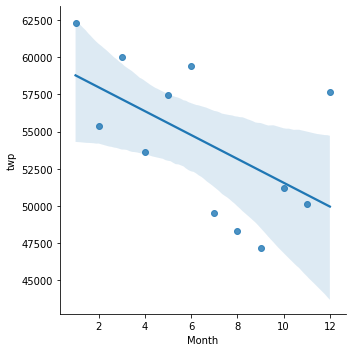

In [50]:
sns.lmplot(x='Month',y='twp',data=bymonth.reset_index())

In [51]:
# Getting Date by group by 

In [52]:
df['Date']=df['timeStamp'].apply(lambda x:x.date())

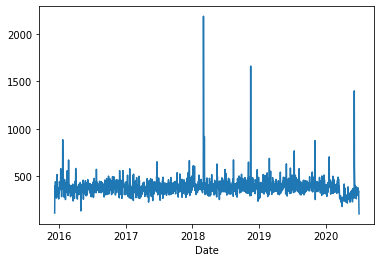

In [53]:
df.groupby('Date').count()['lat'].plot()

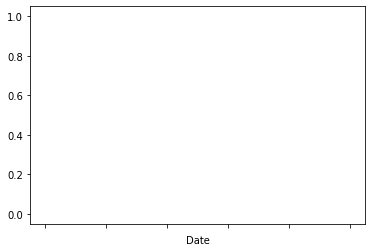

In [57]:
df[df['Reason']=='Fire'].groupby('Date').count()['lat'].plot()


In [65]:
df.groupby(by=['Day Of Week','Hour']).count()['Reason']

Day Of Week  Hour
Fri          0       1949
             1       1615
             2       1429
             3       1281
             4       1309
                     ... 
Wed          19      4615
             20      4054
             21      3491
             22      2778
             23      2168
Name: Reason, Length: 168, dtype: int64

In [59]:
#plt.tight_layout()

TypeError: 'module' object is not callable

In [67]:
dayhour=df.groupby(by=['Day Of Week','Hour']).count()['Reason'].unstack()

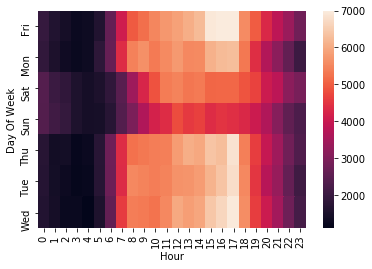

In [68]:
sns.heatmap(dayhour)

In [72]:
plt.figure(figsize=(12,6))

TypeError: 'module' object is not callable